O projeto estuda a termodinâmica do ar no interior de um iglu e tem como diagrama de estoque e fluxos:
    <img src="IgluDiagrama1.png"/, width=600, height=400 style="float: center; margin: 0px 0px 10px 10px">
Que é regido pelas seguintes equações:
<img src="EquacoesIglu2.png"/, width=400, height=250 style="float: center; margin: 0px 0px 10px 10px">

    

In [16]:
from math import pi

def var(T0,t):
    Temp=T0[0]
    Qp = (emissividade * o * AreaHumano * (Thumano**4-Temp**4)) * Npessoas
    #Qf =  o * AreaFogo * Tfogo**4
    Qf = 0
    Qq = Qp + Qf
    Qr = (Temp - ta)/(espessura/(kneve*AinternaIglu)+1/(har*AinternaIglu))
    #Qr = (kneve*AinternaIglu/espessura+har*AinternaIglu)*(Temp - ta)
    dTdt = (1/m0*cneve) * (Qq - Qr) #Mudar o Cneve para C do ar
    return dTdt


In [17]:
from math import pi
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

emissividade = 0.95
har = 10
o = 5.67 * 10**(-8)
AreaHumano = 2 #m2
Thumano = 273+37 #Kelvin
Npessoas = 5
AreaFogo = 1.256*10**-3
Tfogo = 1672
kneve = 0.3
raio = 2
AinternaIglu = 4*pi*raio**2/2
ta = -43.15 + 273.15
T0 = [ta]
espessura = 0.33
volume_ar =  33.5103/2
densidade_ar = 1.2922
m0 = densidade_ar * volume_ar
cneve = 2090

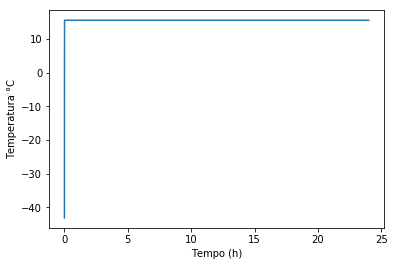

In [18]:
Tmax = 24*60*60
listaTempo = np.arange(0,Tmax,0.1)

solucao = odeint(var,T0,listaTempo)

TempC = [temp-273.15 for temp in solucao[:,0]]
TempoH = [t/3600 for t in listaTempo]

#plt.plot(listaTempo/3600,solucao-273.15)
plt.plot(TempoH,TempC)
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura °C')
plt.show()

In [191]:
for e in range(5,50,1):
    dp = e/100
    ap = (4*pi*(2+dp)**2)/2
    solucao = odeint(var,t0,listaTempo)

NameError: name 'Ta' is not defined